In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
from scipy.interpolate import RegularGridInterpolator as RGI
import random

integrmodel = 'vode' # 'lsoda', 'dopri5', 'dop853'
max_step = 1000
step_size = 0.01
n_sphere = 10
Rsphere = 0.10

s, e, d = -4, 4, 0.05
Rsphere2 = Rsphere ** 2

X, Y, Z = np.mgrid[s:e:d, s:e:d, s:e:d]

Ex = 0.*X
Ey = 0.*Y
Ez = 0.*Z

In [2]:
f = np.array([0, 1, 0])           # direction of the force
r0 = np.array([0,0,0])

def stokeslet(f, r0, mX, mY, mZ):

    Id = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    r = np.array([mX - r0[0], mY - r0[1], mZ - r0[2]])
    Idf = np.dot(Id, f)
    rTf = (r * f[:, np.newaxis, np.newaxis, np.newaxis]).sum(axis=0)
    rrTf = (r * rTf[np.newaxis,])
    modr = np.sqrt(r[0]**2 + r[1]**2 + r[2]**2)
    u, v, w = Idf[:, np.newaxis, np.newaxis, np.newaxis] / modr + rrTf / modr**3.
    return [u, v, w] 

Ex, Ey, Ez = stokeslet(f, r0, X, Y, Z)

/var/folders/95/7_vspww56v5bfch3bd_lv06c0000gn/T/ipykernel_36088/2272050594.py:12: RuntimeWarning: divide by zero encountered in divide
  u, v, w = Idf[:, np.newaxis, np.newaxis, np.newaxis] / modr + rrTf / modr**3.
/var/folders/95/7_vspww56v5bfch3bd_lv06c0000gn/T/ipykernel_36088/2272050594.py:12: RuntimeWarning: invalid value encountered in divide
  u, v, w = Idf[:, np.newaxis, np.newaxis, np.newaxis] / modr + rrTf / modr**3.


In [4]:

Exi = RGI((X[:, 0, 0], Y[0, :, 0], Z[0, 0, :]), Ex, method='linear')

Eyi = RGI((X[:, 0, 0], Y[0, :, 0], Z[0, 0, :]), Ey, method='linear')

Ezi = RGI((X[:, 0, 0], Y[0, :, 0], Z[0, 0, :]), Ez, method='linear') 


In [3]:
def IL3(t, coord):
    global abort
    xi = coord[0]
    yi = coord[1]
    zi = coord[2]
    try:
        ex = Exi([xi, yi, zi])[0]
        ey = Eyi([xi, yi, zi])[0]
        ez = Ezi([xi, yi, zi])[0]
    except:
        abort = True
        return [0, 0, 0]
    return [ex, ey, ez]

In [4]:

n = 5
space = np.linspace(-2.5, 2.5, n)
exes = np.zeros(n*n)
ezes = np.zeros(n*n)
eyes = np.zeros(n*n)
step = 0

exes = []
ezes = []
eyes = []

for i in range(0, n):
  for k in range(0, n):
      step = step +1
      exes.append(space[i])
      ezes.append(space[k])
      eyes.append(-2.5)



xxx = np.zeros(n*n)
yyy = np.zeros(n*n)
zzz = np.zeros(n*n)

for i in range(0, n*n):
  xxx[i] = exes[i]
  yyy[i] = eyes[i]
  zzz[i] = ezes[i]

places = np.vstack([xxx, yyy, zzz]).T

In [5]:

n=21
R=2
xxx = np.zeros(n)
yyy = np.zeros(n)
zzz = np.zeros(n)

ystart = np.linspace(-2.5, -2.5, 21)

angle = np.linspace(0, 2*np.pi, 21)

xstart = np.zeros(21)
zstart = np.zeros(21)

for i in range(0, len(angle)):
  zstart[i] = R*np.cos(angle[i])
  xstart[i] = R*np.sin(angle[i])


for i in range(0, n):
  xxx[i] = xstart[i]
  yyy[i] = ystart[i]
  zzz[i] = zstart[i]

places = np.vstack([xxx, yyy, zzz]).T
print(len(zzz))


21


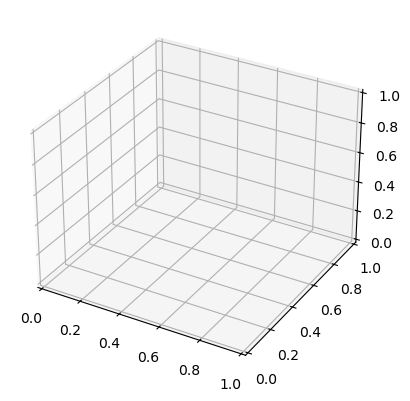

In [7]:

ax = plt.figure().add_subplot(projection='3d')

dt = step_size




xlist = []
ylist = []
zlist = []
for p in places:

  r = ode(IL3)
  r.set_integrator(integrmodel)
  lx=[p[0]]
  ly=[p[1]]
  lz = [p[2]]
  r.set_initial_value([lx[0], ly[0], lz[0]], 0)

  step = 0
  abort = False

  while r.successful():
      step += 1

      r.integrate(r.t+dt)
      x, y, z = r.y[0], r.y[1], r.y[2]

      lx.append(x)
      ly.append(y)
      lz.append(z)
      xlist.append(x)
      ylist.append(y)
      zlist.append(z)
      
      if s >= x or e <= x or s >= y or e <= y or  s >= z or e <= z:
          xlist.append(None)
          ylist.append(None)
          zlist.append(None)
          break

      if step >= max_step:
          xlist.append(None)
          ylist.append(None)
          zlist.append(None) 
          break

      if abort is True:
          abort = False
          xlist.append(None)
          ylist.append(None)
          zlist.append(None) 
          break

      plt.plot(lx, ly, lz,  'k', lw=0.5)

        #singe_array = np.array([None, None, None])
        #triple_list.append(single_array)

In [16]:
triple_list = []

for i in range(0, len(xlist)):
    single_array = np.array([xlist[i], ylist[i], zlist[i]])
    triple_list.append(single_array)

triple_array = np.array(triple_list)


np.savez('output_22', triple_array)

[[-2.4992300747839122 -2.4969202732852613 -2.4992300747839122]
 [-2.498459938286775 -2.493839660473884 -2.498459938286775]
 [-2.497689577284779 -2.4907581061062785 -2.497689577284779]
 ...
 [2.1253979502492126 0.8716722445223737 2.1253979502492126]
 [2.126003017227297 0.8751154228222533 2.126003017227297]
 [None None None]]


In [31]:

"""

for i in range(n_sphere):

  phi = random.uniform(-np.pi, np.pi)
  tet = random.uniform(-np.pi, np.pi)
  lx = [r0[0] + np.sin(phi) * np.cos(tet) * Rsphere]
  ly = [0]
  lz = [r0[2] + np.cos(phi) * Rsphere]


  r = ode(IL3)
  r.set_integrator(integrmodel)

  r.set_initial_value([lx[0], ly[0], lz[0]], 0)
"""

'\n\nfor i in range(n_sphere):\n\n  phi = random.uniform(-np.pi, np.pi)\n  tet = random.uniform(-np.pi, np.pi)\n  lx = [r0[0] + np.sin(phi) * np.cos(tet) * Rsphere]\n  ly = [0]\n  lz = [r0[2] + np.cos(phi) * Rsphere]\n\n\n  r = ode(IL3)\n  r.set_integrator(integrmodel)\n\n  r.set_initial_value([lx[0], ly[0], lz[0]], 0)\n'

In [17]:
print("x: ", len(xlist), "y: ", len(ylist), "z: ", len(zlist))

x:  23043 y:  23043 z:  23043


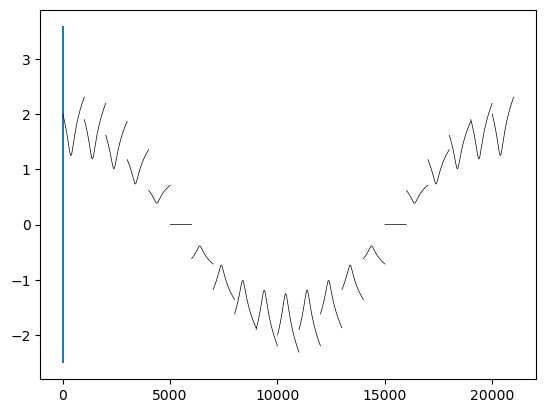

In [17]:
plt.plot(xlist, ylist, zlist,  'k', lw=0.5)